# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import time  
import copy
from torch import nn
from collections import namedtuple, deque
import torch
import torch.optim as optim
from model import Actor, Critic
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:

env = UnityEnvironment(file_name="/home/bobding/disk1t/Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.09000000171363354
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.09000000171363354


Now prepare agent andstart training

In [6]:
### 4. Train


from agent import Agent

agent1 = Agent(state_size=state_size, action_size=action_size, random_seed=4)


In [7]:
#show resules 
def plot_results(scores):  
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

The following function provides the training function.

In [8]:
def train(n_episodes=1000000, max_steps=10000):
    scores_mean = deque(maxlen=100)
    scores = []
    best_score = 0
    best_average_score = 0
    
    for i_episode in range(1, n_episodes+1):                       
        average_score = 0
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations            
        scores_agents = np.zeros(num_agents)             
        score = 0
    
        agent1.reset()

        for step in range(max_steps):
            actions = agent1.act(states)
            env_info = env.step(actions)[brain_name]     
            next_states = env_info.vector_observations   
            rewards = env_info.rewards                   
            dones = env_info.local_done
            
            agent1.step(states, actions, rewards, next_states, dones, step)
                
            states = next_states
            scores_agents += rewards
            if np.any(dones):
                break

        score = scores_agents.max()
        scores_mean.append(score)
        average_score = np.mean(scores_mean)
        scores.append(score)
        if score > best_score:
            best_score = score
        if average_score > best_average_score:
            best_average_score = average_score
        
        print("Episode:{}, Low Score:{:.2f}, High Score:{:.2f}, Score:{:.2f}, Best Score:{:.2f}, Average Score:{:.2f}, Best Avg Score:{:.2f}".format(i_episode, scores_agents.min(), scores_agents.max(), score, best_score, average_score, best_average_score))
        if average_score > 0.5:
            print("Episode:{}, Low Score:{:.2f}, High Score:{:.2f}, Score:{:.2f}, Best Score:{:.2f}, Average Score:{:.2f}, Best Avg Score:{:.2f}".format(i_episode, scores_agents.min(), scores_agents.max(), score, best_score, average_score, best_average_score))
            torch.save(agent1.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent1.critic_local.state_dict(), 'checkpoint_critic.pth')                  
            break
            
    return scores

In [9]:
scores = train(n_episodes=1000000, max_steps=10000)

/home/bobding/anaconda3/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode:1, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.10, Average Score:0.10, Best Avg Score:0.10
Episode:2, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.05, Best Avg Score:0.10
Episode:3, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:4, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:5, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:6, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:7, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:8, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:9, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:

/home/bobding/disk1t/SynologyDrive/Udacity-RL-nano/collab-compet-github/agent.py:125: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode:33, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:34, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:35, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:36, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:37, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:38, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:39, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:40, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:41, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.10, Avera

Episode:105, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:106, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:107, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:108, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:109, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:110, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:111, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:112, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:113, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.

Episode:176, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:177, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:178, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:179, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:180, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:181, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:182, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:183, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:184, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.

Episode:247, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:248, Low Score:0.00, High Score:0.09, Score:0.09, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:249, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:250, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:251, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:252, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:253, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:254, Low Score:0.00, High Score:0.09, Score:0.09, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:255, Low Score:0.00, High Score:0.09, Score:0.09, Best Score:0.10,

Episode:318, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:319, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:320, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:321, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:322, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:323, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:324, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:325, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:326, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.

Episode:389, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:390, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:391, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:392, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:393, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:394, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:395, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:396, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.00, Best Avg Score:0.10
Episode:397, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.

Episode:460, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:461, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:462, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:463, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:464, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:465, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:466, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:467, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:468, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.

Episode:531, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:532, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:533, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:534, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:535, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:536, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:537, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:538, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:539, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.

Episode:602, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:603, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:604, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:605, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:606, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:607, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:608, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:609, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:610, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.

Episode:673, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:674, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.10, Average Score:0.01, Best Avg Score:0.10
Episode:675, Low Score:0.00, High Score:0.09, Score:0.09, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:676, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:677, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:678, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:679, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:680, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.02, Best Avg Score:0.10
Episode:681, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.1

Episode:744, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:745, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:746, Low Score:0.00, High Score:0.09, Score:0.09, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:747, Low Score:0.09, High Score:0.10, Score:0.10, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:748, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:749, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:750, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:751, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10, Average Score:0.03, Best Avg Score:0.10
Episode:752, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.10

Episode:815, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.20, Average Score:0.03, Best Avg Score:0.10
Episode:816, Low Score:0.00, High Score:0.09, Score:0.09, Best Score:0.20, Average Score:0.03, Best Avg Score:0.10
Episode:817, Low Score:0.19, High Score:0.20, Score:0.20, Best Score:0.20, Average Score:0.04, Best Avg Score:0.10
Episode:818, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.20, Average Score:0.04, Best Avg Score:0.10
Episode:819, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.20, Average Score:0.04, Best Avg Score:0.10
Episode:820, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.20, Average Score:0.04, Best Avg Score:0.10
Episode:821, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.20, Average Score:0.04, Best Avg Score:0.10
Episode:822, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.20, Average Score:0.04, Best Avg Score:0.10
Episode:823, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.20

Episode:886, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.40, Average Score:0.04, Best Avg Score:0.10
Episode:887, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.40, Average Score:0.04, Best Avg Score:0.10
Episode:888, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.40, Average Score:0.04, Best Avg Score:0.10
Episode:889, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.40, Average Score:0.04, Best Avg Score:0.10
Episode:890, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.40, Average Score:0.04, Best Avg Score:0.10
Episode:891, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.40, Average Score:0.04, Best Avg Score:0.10
Episode:892, Low Score:0.00, High Score:0.09, Score:0.09, Best Score:0.40, Average Score:0.04, Best Avg Score:0.10
Episode:893, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.04, Best Avg Score:0.10
Episode:894, Low Score:0.19, High Score:0.20, Score:0.20, Best Score:0.40

Episode:957, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.06, Best Avg Score:0.10
Episode:958, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:0.40, Average Score:0.06, Best Avg Score:0.10
Episode:959, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.06, Best Avg Score:0.10
Episode:960, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.06, Best Avg Score:0.10
Episode:961, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.40, Average Score:0.06, Best Avg Score:0.10
Episode:962, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:0.40, Average Score:0.06, Best Avg Score:0.10
Episode:963, Low Score:0.09, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.07, Best Avg Score:0.10
Episode:964, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.07, Best Avg Score:0.10
Episode:965, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.40,

Episode:1028, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1029, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1030, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1031, Low Score:0.00, High Score:0.09, Score:0.09, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1032, Low Score:0.10, High Score:0.19, Score:0.19, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1033, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1034, Low Score:0.09, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1035, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1036, Low Score:0.00, High Score:0.09, Score:0.09, Best Sco

Episode:1099, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1100, Low Score:0.00, High Score:0.09, Score:0.09, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1101, Low Score:0.19, High Score:0.30, Score:0.30, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1102, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1103, Low Score:0.00, High Score:0.09, Score:0.09, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1104, Low Score:0.00, High Score:0.09, Score:0.09, Best Score:0.40, Average Score:0.10, Best Avg Score:0.10
Episode:1105, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:0.40, Average Score:0.11, Best Avg Score:0.11
Episode:1106, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.40, Average Score:0.11, Best Avg Score:0.11
Episode:1107, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score

Episode:1170, Low Score:0.10, High Score:0.19, Score:0.19, Best Score:0.90, Average Score:0.16, Best Avg Score:0.16
Episode:1171, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:0.90, Average Score:0.16, Best Avg Score:0.16
Episode:1172, Low Score:0.09, High Score:0.10, Score:0.10, Best Score:0.90, Average Score:0.16, Best Avg Score:0.16
Episode:1173, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:0.90, Average Score:0.16, Best Avg Score:0.16
Episode:1174, Low Score:0.09, High Score:0.10, Score:0.10, Best Score:0.90, Average Score:0.16, Best Avg Score:0.16
Episode:1175, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.90, Average Score:0.16, Best Avg Score:0.16
Episode:1176, Low Score:0.09, High Score:0.10, Score:0.10, Best Score:0.90, Average Score:0.16, Best Avg Score:0.16
Episode:1177, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.90, Average Score:0.16, Best Avg Score:0.16
Episode:1178, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:

Episode:1241, Low Score:0.69, High Score:0.70, Score:0.70, Best Score:0.90, Average Score:0.17, Best Avg Score:0.17
Episode:1242, Low Score:0.19, High Score:0.30, Score:0.30, Best Score:0.90, Average Score:0.16, Best Avg Score:0.17
Episode:1243, Low Score:0.49, High Score:0.50, Score:0.50, Best Score:0.90, Average Score:0.16, Best Avg Score:0.17
Episode:1244, Low Score:0.19, High Score:0.20, Score:0.20, Best Score:0.90, Average Score:0.17, Best Avg Score:0.17
Episode:1245, Low Score:0.19, High Score:0.30, Score:0.30, Best Score:0.90, Average Score:0.17, Best Avg Score:0.17
Episode:1246, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:0.90, Average Score:0.17, Best Avg Score:0.17
Episode:1247, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:0.90, Average Score:0.17, Best Avg Score:0.17
Episode:1248, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:0.90, Average Score:0.17, Best Avg Score:0.17
Episode:1249, Low Score:-0.01, High Score:0.10, Score:0.10, Best Score:

Episode:1312, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:0.90, Average Score:0.17, Best Avg Score:0.17
Episode:1313, Low Score:0.59, High Score:0.70, Score:0.70, Best Score:0.90, Average Score:0.17, Best Avg Score:0.17
Episode:1314, Low Score:0.19, High Score:0.30, Score:0.30, Best Score:0.90, Average Score:0.18, Best Avg Score:0.18
Episode:1315, Low Score:0.19, High Score:0.20, Score:0.20, Best Score:0.90, Average Score:0.18, Best Avg Score:0.18
Episode:1316, Low Score:0.19, High Score:0.30, Score:0.30, Best Score:0.90, Average Score:0.18, Best Avg Score:0.18
Episode:1317, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.90, Average Score:0.18, Best Avg Score:0.18
Episode:1318, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.90, Average Score:0.17, Best Avg Score:0.18
Episode:1319, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:0.90, Average Score:0.17, Best Avg Score:0.18
Episode:1320, Low Score:0.09, High Score:0.10, Score:0.10, Best Score

Episode:1383, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:2.00, Average Score:0.24, Best Avg Score:0.24
Episode:1384, Low Score:0.19, High Score:0.20, Score:0.20, Best Score:2.00, Average Score:0.24, Best Avg Score:0.24
Episode:1385, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:2.00, Average Score:0.24, Best Avg Score:0.24
Episode:1386, Low Score:0.19, High Score:0.20, Score:0.20, Best Score:2.00, Average Score:0.24, Best Avg Score:0.24
Episode:1387, Low Score:0.10, High Score:0.19, Score:0.19, Best Score:2.00, Average Score:0.24, Best Avg Score:0.24
Episode:1388, Low Score:0.19, High Score:0.30, Score:0.30, Best Score:2.00, Average Score:0.24, Best Avg Score:0.24
Episode:1389, Low Score:0.19, High Score:0.20, Score:0.20, Best Score:2.00, Average Score:0.24, Best Avg Score:0.24
Episode:1390, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:2.00, Average Score:0.24, Best Avg Score:0.24
Episode:1391, Low Score:0.29, High Score:0.30, Score:0.30, Best Score:2

Episode:1454, Low Score:0.19, High Score:0.30, Score:0.30, Best Score:2.00, Average Score:0.23, Best Avg Score:0.24
Episode:1455, Low Score:0.09, High Score:0.10, Score:0.10, Best Score:2.00, Average Score:0.23, Best Avg Score:0.24
Episode:1456, Low Score:0.09, High Score:0.20, Score:0.20, Best Score:2.00, Average Score:0.23, Best Avg Score:0.24
Episode:1457, Low Score:0.19, High Score:0.30, Score:0.30, Best Score:2.00, Average Score:0.24, Best Avg Score:0.24
Episode:1458, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:2.00, Average Score:0.24, Best Avg Score:0.24
Episode:1459, Low Score:0.19, High Score:0.30, Score:0.30, Best Score:2.00, Average Score:0.22, Best Avg Score:0.24
Episode:1460, Low Score:0.19, High Score:0.30, Score:0.30, Best Score:2.00, Average Score:0.22, Best Avg Score:0.24
Episode:1461, Low Score:0.09, High Score:0.10, Score:0.10, Best Score:2.00, Average Score:0.22, Best Avg Score:0.24
Episode:1462, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:

Episode:1525, Low Score:0.29, High Score:0.40, Score:0.40, Best Score:2.00, Average Score:0.29, Best Avg Score:0.29
Episode:1526, Low Score:0.59, High Score:0.60, Score:0.60, Best Score:2.00, Average Score:0.29, Best Avg Score:0.29
Episode:1527, Low Score:0.19, High Score:0.30, Score:0.30, Best Score:2.00, Average Score:0.29, Best Avg Score:0.29
Episode:1528, Low Score:-0.01, High Score:0.00, Score:0.00, Best Score:2.00, Average Score:0.29, Best Avg Score:0.29
Episode:1529, Low Score:0.39, High Score:0.50, Score:0.50, Best Score:2.00, Average Score:0.30, Best Avg Score:0.30
Episode:1530, Low Score:1.79, High Score:1.90, Score:1.90, Best Score:2.00, Average Score:0.31, Best Avg Score:0.31
Episode:1531, Low Score:1.79, High Score:1.80, Score:1.80, Best Score:2.00, Average Score:0.33, Best Avg Score:0.33
Episode:1532, Low Score:0.39, High Score:0.40, Score:0.40, Best Score:2.00, Average Score:0.33, Best Avg Score:0.33
Episode:1533, Low Score:0.49, High Score:0.60, Score:0.60, Best Score:2

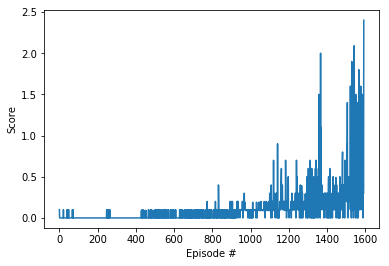

In [10]:
plot_results(scores)


In [11]:
from agent import Agent

agent1 = Agent(state_size=state_size, action_size=action_size, random_seed=4, mnoise=False, split_state=False)
agent1.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent1.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))


### 5. Test

In [12]:
def test(n_episodes=1, max_steps=1000):
    scores_hundred_queue = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]
        states = env_info.vector_observations            
        scores_agents = np.zeros(num_agents)             
        agent1.reset()
        score = 0
        for step in range(max_steps):
            actions = agent1.act(states)
            env_info = env.step(actions)[brain_name]     
            next_states = env_info.vector_observations   
            rewards = env_info.rewards                   
            dones = env_info.local_done                  
            agent1.step(states, actions, rewards, next_states, dones, step)
            states = next_states
            scores_agents += rewards
            if np.any(dones):
                break
        score = score = scores_agents.max()
        scores.append(score)        
        print("Episode: ", i_episode)
        print("Score: {:.2f}".format(score))
    
       
        
      
    return scores



In [13]:
scores = test()

Episode:  1
Score: 0.60


In [14]:
env.close()